# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, February 1, 2017

## Logistic Regression 

### Key Points
SETUP: We have a set of data points $\{(x_{1}, y_{1}), (x_{2}, y_{2}), ... , (x_{n}, y_{n})\}$, where $x_{i} \in R^{d}$ are the feature vectors and $y_{i} \in \{0, 1\}$ are the class labels.

MODEL: $p_{+} = p(y = 1|x) = \frac{1}{1 + e^{-w.x + b}}$, where $w, b \in R^{d}$

DISTANCE FUNCTION: -$(y * log(p_{+}) + (1 - y) * log(1 - p_{+}))$

LEARNING RULE: $w \leftarrow w - \eta * (\hat{y} - y) * x$

In [7]:
%matplotlib notebook

import numpy
import matplotlib.pyplot as plot

import matplotlib
#matplotlib.rc('text', usetex=True)

In [8]:
numpy.random.seed(1234)

## 1. Data Preparation

In [9]:
from sklearn.datasets import make_blobs

In [10]:
# Sample dataset preparation

n_dim = 2
x_train, y_train = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)
x_test, y_test = make_blobs(n_samples=100, n_features=n_dim, centers=[[1,1],[-1,-1]], shuffle=True)

## 2. Model Definition

In [11]:
'''
Sigmoid function.

INPUT: A scalar/vector
OUTPUT: A value between (0, 1) for each input component
'''

def sigmoid(a):
    return 1. / (1. + numpy.exp(-a))

In [12]:
'''
Definition of the logistic regression model.

INPUT: Feature vector (x) and weight vector (w)
OUTPUT: The probability of each data point belonging to the positive class.
'''

def logreg(x, w, pre=False):
    x = x.reshape([1, -1]) if len(x.shape) < 2 else x
    
    y = numpy.sum(x * w[None,:-1], axis=1) + w[-1]
    if pre:
        return y    
    return sigmoid(y)

In [13]:
'''
Distance function of the logistic regression model (popularly called likelihood). 

INPUT: True labels (y), feature vector (x) and weight vector (w)
OUTPUT: Log of the likelihood for the given 'w'
'''

def logreg_dist(y, x, w, avg=False):
    y_ = logreg(x, w)
    
    d = -(y * numpy.log(y_) + (1. - y) * numpy.log(1-y_))
    
    if not avg:
        return d
    return numpy.mean(d)

In [14]:
'''
Learning rule for the logistic regression model.

INPUT: True labels (y), feature vector (x) and weight vector (w)
OUTPUT: The direction of update for the weight vector
'''

def logreg_rule(y, x, w):
    y_ = logreg(x, w)
    dw = numpy.zeros(w.shape)
    dw[:-1] = numpy.mean((y_ - y)[:, None] * x, axis=0)
    dw[-1] = numpy.mean(y_ - y)
    return dw

## 3. Learning Process

In [15]:
# Initializing the weight vector randomly
w0 = numpy.random.randn(n_dim+1); w0[-1] = 0.
w = numpy.copy(w0)

n_iter = 1000
eta = 10   # Learning rate
old_cost = numpy.Inf

for ni in range(n_iter):
    pred_y = logreg(x_train, w)
    
    w -= eta * logreg_rule(y_train, x_train, w)    # Updating the weight vector
    
    cost = logreg_dist(y_train, x_train, w, avg=True)
    
    if numpy.mod(ni, 50) == 0:
        print ('Logistic regression cost {} after iteration {}'.format(cost, ni))
    if cost < 1e-16 or cost / old_cost >= 1.:
        print ('Converged')
        break
    old_cost = cost

Logistic regression cost nan after iteration 0
Logistic regression cost nan after iteration 50
Logistic regression cost 0.08340529607022765 after iteration 100
Logistic regression cost 0.08052536834789396 after iteration 150
Logistic regression cost 0.08003165856455105 after iteration 200
Logistic regression cost 0.07998915083301783 after iteration 250
Logistic regression cost 0.07998649365627253 after iteration 300
Logistic regression cost 0.0799863428169486 after iteration 350
Logistic regression cost 0.07998633445918492 after iteration 400
Logistic regression cost 0.07998633399876226 after iteration 450
Logistic regression cost 0.0799863339734324 after iteration 500
Logistic regression cost 0.07998633397203933 after iteration 550
Logistic regression cost 0.07998633397196273 after iteration 600
Converged


/Users/alperenkaraoglu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log
/Users/alperenkaraoglu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply


In [16]:
print ('Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)))
print ('Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w)))

Initial: 0.9 x_1 + 0.75 x_2 + 0.0 = 0
Final: -5.0 x_1 + -2.5 x_2 + 0.58 = 0


## 4. Visualize Final Model

In [17]:
# visualize data 
def vis_data(x, y = None, c='r'):
    if y is None: 
        y = [None] * len(x)
    plot.hold('on')
    for x_, y_ in zip(x, y):
        if y_ is None:
            plot.plot(x_[0], x_[1], 'o', markerfacecolor='none', markeredgecolor=c)
        else:
            plot.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
    plot.hold('off')
    plot.grid('on')

In [18]:
def vis_hyperplane(w, typ='k--'):
    plot.hold('on')

    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    m0, m1 = lim0[0], lim0[1]

    intercept0 = -(w[0] * m0 + w[-1])/w[1]
    intercept1 = -(w[0] * m1 + w[-1])/w[1]
    
    plt1, = plot.plot([m0, m1], [intercept0, intercept1], typ)

    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

In [19]:
def vis_decision_boundary_contour(w, typ='k--'):
    plot.hold('on')
    
    lim0 = plot.gca().get_xlim()
    lim1 = plot.gca().get_ylim()
    
    x_ = numpy.linspace(lim0[0], lim0[1], 100)
    y_ = numpy.linspace(lim1[0], lim1[1], 100)
    xx, yy = numpy.meshgrid(x_, y_)
    
    x_tra_ = numpy.concatenate([xx.ravel()[:,None], yy.ravel()[:,None]], axis=1)
    
    pred = logreg(x_tra_, w)
    plt1 = plot.contourf(xx, yy, pred.reshape(xx.shape), cmap=plot.cm.coolwarm, alpha=0.4)
    
    plot.colorbar(plt1)
    
    plot.gca().set_xlim(lim0)
    plot.gca().set_ylim(lim1)
    
    plot.hold('off')
    
    return plt1

<IPython.core.display.Javascript object>


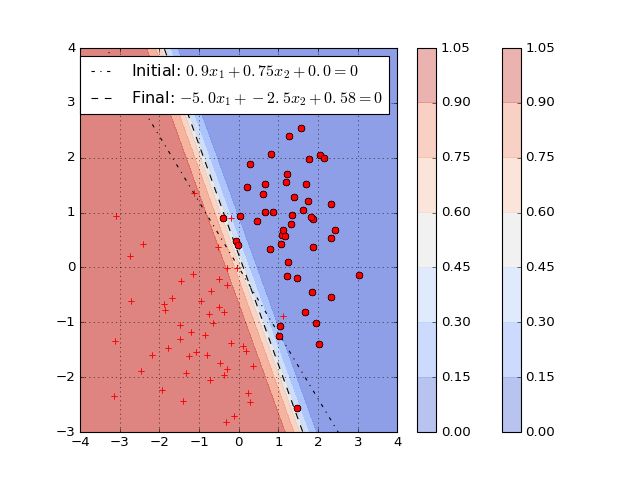

In [20]:
plot.figure()

vis_data(x_train, y_train, c='r')

plt0 = vis_hyperplane(w0, 'k-.')
plt1 = vis_hyperplane(w, 'k--')
plot.legend([plt0, plt1], [
        'Initial: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w0)),
        'Final: ${:.2} x_1 + {:.2} x_2 + {:.2} = 0$'.format(*list(w))],
           loc='best')

plot.show()

In [22]:
vis_data(x_train, y_train, c= 'r')
vis_decision_boundary_contour(w)

## 5. Testing

<IPython.core.display.Javascript object>


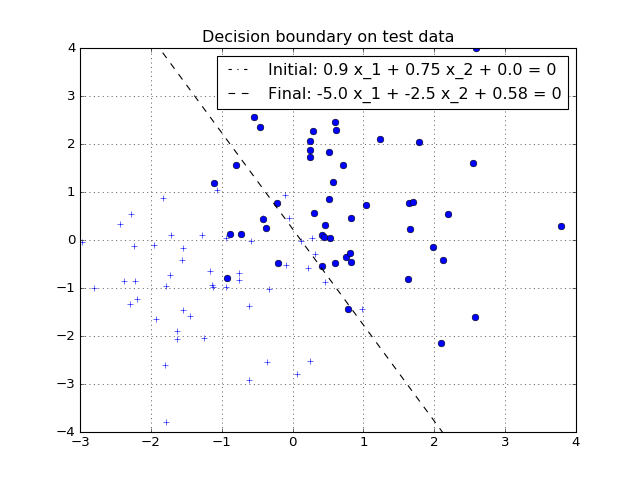

/Users/alperenkaraoglu/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [23]:
# Decision boundary on test data

plot.figure()

vis_data(x_test, y_test, 'b')

plt1 = vis_hyperplane(w, 'k--')

plot.legend([plt0, plt1], [
        'Initial: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w0)),
        'Final: {:.2} x_1 + {:.2} x_2 + {:.2} = 0'.format(*list(w))],
           loc='upper right')

plot.legend(fontsize = 20, loc = 'best')
plot.title('Decision boundary on test data')
plot.show()

In [25]:
train_error = numpy.sum(numpy.abs(numpy.round(logreg(x_train, w)) - y_train)) / numpy.float(len(y_train))
test_error = numpy.sum(numpy.abs(numpy.round(logreg(x_test, w)) - y_test)) / numpy.float(len(y_test))

print ('Training error rate {}, Test error rate {}'.format(train_error, test_error))

Training error rate 0.03, Test error rate 0.14


## 6. HOMEWORK - Use scikit-learn to replicate the above operations

In [45]:
# Use this cell to import required packages of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
# STEP 1: Create a Logistic Regression class instance

logisticRegression = LogisticRegression(C=1e5)



In [47]:
# STEP 2: Fit the logistic regression model to the training data

logisticRegression.fit(x_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [48]:
# STEP 3: Obtain the coefficients of the learned model (read the documentation to find out how)
print ('Final: %.2f x_1 + x_2 %.2f = 0' % (logisticRegression.coef_[0][0], logisticRegression.coef_[0][1]))


Final: -4.96 x_1 + x_2 -2.48 = 0


In [49]:
# STEP 4: Compare the feature coefficients obtained by sklearn and the custom module we have

# Note: Print the equations of the model learned by both implementations and comment about what you observe.

#In this case the result provided by sklearn and the custom model are almost the same, it seems as though
#sklaearn is a little more precise than the custom model
print ('sklearn: %.2f x_1 + x_2 %.2f = 0' % (logisticRegression.coef_[0][0], logisticRegression.coef_[0][1]))
print ('Custom: {:.2} x_1 + x_2 {:.2} = 0'.format(*list(w)))

sklearn: -4.96 x_1 + x_2 -2.48 = 0
Custom: -5.0 x_1 + x_2 -2.5 = 0


In [44]:
# STEP 5: Predict the class of test data points. Print the TRAINING and TEST accuracy.

train_pred = logisticRegression.predict(x_train)
test_pred = logisticRegression.predict(x_test)

print ("Training Accuracy: ", accuracy_score(y_train, train_pred))
print ("Test Accuracy: ", accuracy_score(y_test, test_pred))


Training Accuracy:  0.97
Test Accuracy:  0.86
